<a href="https://colab.research.google.com/github/jefftrojan/SIMPLEx-MARL/blob/main/simplexMARL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install gymnasium numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 3.9 MB/s eta 0:00:00


# Create Grid environment

In [10]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
from matplotlib import colors

class GridWorldEnv(gym.Env):
    def __init__(self, grid_size=5, num_agents=2):
        super(GridWorldEnv, self).__init__()
        self.grid_size = grid_size
        self.num_agents = num_agents

        # Define action and observation spaces
        self.action_space = spaces.Discrete(4)  # 4 possible actions: up, down, left, right
        self.observation_space = spaces.Box(low=0, high=self.grid_size - 1, shape=(num_agents, 2), dtype=np.int32)

        # Define rewards and initial agent positions
        self.agent_positions = np.zeros((self.num_agents, 2), dtype=np.int32)
        self.reset()

        # Initialize visualization
        self.fig, self.ax = plt.subplots()

    def reset(self):
        # Reset the environment and agents to random positions
        self.agent_positions = np.random.randint(0, self.grid_size, size=(self.num_agents, 2))
        return self.agent_positions

    def step(self, actions):
        rewards = np.zeros(self.num_agents)
        for i, action in enumerate(actions):
            if action == 0:  # Move up
                self.agent_positions[i][0] = max(0, self.agent_positions[i][0] - 1)
            elif action == 1:  # Move down
                self.agent_positions[i][0] = min(self.grid_size - 1, self.agent_positions[i][0] + 1)
            elif action == 2:  # Move left
                self.agent_positions[i][1] = max(0, self.agent_positions[i][1] - 1)
            elif action == 3:  # Move right
                self.agent_positions[i][1] = min(self.grid_size - 1, self.agent_positions[i][1] + 1)

        # Define rewards (e.g., if the agent reaches the bottom-right corner)
        for i in range(self.num_agents):
            if np.array_equal(self.agent_positions[i], [self.grid_size - 1, self.grid_size - 1]):
                rewards[i] = 1  # Reward if the agent reaches the bottom-right corner

        return self.agent_positions, rewards, False, {}

    def render(self):
        grid = np.zeros((self.grid_size, self.grid_size), dtype=int)

        # Set agent positions in the grid
        for i, pos in enumerate(self.agent_positions):
            grid[pos[0], pos[1]] = i + 1  # Different numbers for different agents

        cmap = colors.ListedColormap(['white', 'red', 'blue'])
        bounds = [0, 1, 2, 3]
        norm = colors.BoundaryNorm(bounds, cmap.N)

        self.ax.clear()
        self.ax.imshow(grid, cmap=cmap, norm=norm)
        self.ax.set_xticks(np.arange(-.5, self.grid_size, 1), minor=True)
        self.ax.set_yticks(np.arange(-.5, self.grid_size, 1), minor=True)
        self.ax.grid(which="minor", color="black", linestyle='-', linewidth=2)

        plt.pause(0.1)


# Implement Q-Learning Agent

Since  we have the environment, let’s implement simple Q-learning agents. Each agent will learn independently how to navigate the grid.

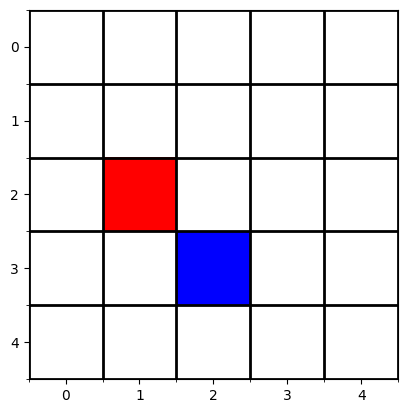

KeyboardInterrupt: 

In [9]:
# Q-Learning Agent
class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.95, exploration_rate=1.0, exploration_decay=0.99):
        self.env = env
        self.q_table = np.zeros((env.grid_size, env.grid_size, env.action_space.n))  # Q-values for each state-action pair
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay

    def choose_action(self, state):
        if np.random.rand() < self.exploration_rate:
            return self.env.action_space.sample()  # Explore: random action
        else:
            # Exploit: choose the action with the highest Q-value
            x, y = state
            return np.argmax(self.q_table[x, y])

    def learn(self, state, action, reward, next_state):
        x, y = state
        next_x, next_y = next_state
        best_next_action = np.argmax(self.q_table[next_x, next_y])

        # Update Q-value using the Bellman equation
        self.q_table[x, y, action] = self.q_table[x, y, action] + self.learning_rate * (
            reward + self.discount_factor * self.q_table[next_x, next_y, best_next_action] - self.q_table[x, y, action]
        )

        # Decay exploration rate
        self.exploration_rate *= self.exploration_decay

# Initialize environment and agents
env = GridWorldEnv(grid_size=5, num_agents=2)
agents = [QLearningAgent(env) for _ in range(env.num_agents)]

# Number of training episodes
num_episodes = 1000

plt.ion()  # Turn on interactive mode for real-time plotting

for episode in range(num_episodes):
    states = env.reset()
    done = False

    while not done:
        actions = [agents[i].choose_action(states[i]) for i in range(env.num_agents)]
        next_states, rewards, done, _ = env.step(actions)

        for i in range(env.num_agents):
            agents[i].learn(states[i], actions[i], rewards[i], next_states[i])

        states = next_states

        # Render the environment and update visualization
        env.render()

    if episode % 100 == 0:
        print(f"Episode {episode}")

plt.ioff()  # Turn off interactive mode
plt.show()  # Show the final plot


# Train Agents in the environment

We’ll now run the agents in the environment, have them learn, and print out their progress.

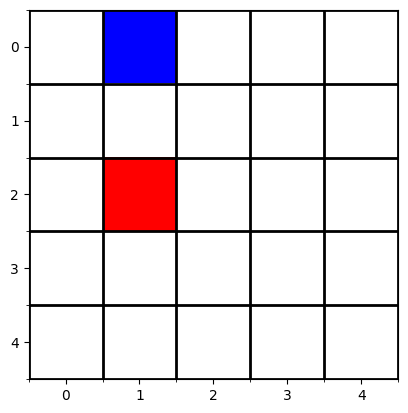

KeyboardInterrupt: 

In [8]:
# Q-Learning Agent
class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.95, exploration_rate=1.0, exploration_decay=0.99):
        self.env = env
        self.q_table = np.zeros((env.grid_size, env.grid_size, env.action_space.n))  # Q-values for each state-action pair
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay

    def choose_action(self, state):
        if np.random.rand() < self.exploration_rate:
            return self.env.action_space.sample()  # Explore: random action
        else:
            # Exploit: choose the action with the highest Q-value
            x, y = state
            return np.argmax(self.q_table[x, y])

    def learn(self, state, action, reward, next_state):
        x, y = state
        next_x, next_y = next_state
        best_next_action = np.argmax(self.q_table[next_x, next_y])

        # Update Q-value using the Bellman equation
        self.q_table[x, y, action] = self.q_table[x, y, action] + self.learning_rate * (
            reward + self.discount_factor * self.q_table[next_x, next_y, best_next_action] - self.q_table[x, y, action]
        )

        # Decay exploration rate
        self.exploration_rate *= self.exploration_decay

# Initialize environment and agents
env = GridWorldEnv(grid_size=5, num_agents=2)
agents = [QLearningAgent(env) for _ in range(env.num_agents)]

# Number of training episodes
num_episodes = 1000

plt.ion()

for episode in range(num_episodes):
    states = env.reset()
    done = False

    while not done:
        actions = [agents[i].choose_action(states[i]) for i in range(env.num_agents)]
        next_states, rewards, done, _ = env.step(actions)

        for i in range(env.num_agents):
            agents[i].learn(states[i], actions[i], rewards[i], next_states[i])

        states = next_states

        # Render the environment and update visualization
        env.render()

    if episode % 100 == 0:
        print(f"Episode {episode}")

plt.ioff()
plt.show()
